In [1]:
import numpy as np

import skimage.io as skio
import skimage.util as sku
import skimage.segmentation as seg
from skimage.future import graph
import skimage.filters as skf
import skimage.color as skc

from sklearn.neighbors import LocalOutlierFactor as LOF
from sklearn.metrics import adjusted_rand_score

In [2]:
import tqdm
import dataset
import itertools as it

In [7]:
img_eval, ann_eval = dataset.make_dataset(limit=100)

In [6]:
from sklearn.cluster import DBSCAN
from skimage.segmentation import slic

def method(img):
    superpixels = slic(img, slic_zero=True)
    sp_features = np.stack([
            img[superpixels == i].mean(axis=0)
            for i in np.unique(superpixels)
        ])
    sp_clusters = DBSCAN(eps=0.1, min_samples=5).fit_predict(sp_features)
    segmentation = sp_clusters[superpixels]
    return segmentation

In [8]:
seg_eval = list(map(
    method,
    tqdm.tqdm(img_eval)
))

100%|██████████| 100/100 [00:49<00:00,  2.02it/s]


In [9]:
scores = [
    adjusted_rand_score(ann.flat, seg.flat)
    for ann, seg in zip(ann_eval, seg_eval)
]

In [10]:
scores = np.array(scores)

In [11]:
np.mean(scores)

0.13854392154660156

In [12]:
best = np.argsort(scores)[::-1]

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

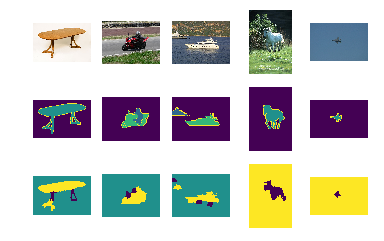

In [15]:
_, axs = plt.subplots(3, 5)
for col, bid in zip(axs.T, best):
    col[0].imshow(img_eval[bid])
    col[0].set_axis_off()
    col[1].matshow(ann_eval[bid])
    col[1].set_axis_off()
    col[2].matshow(seg_eval[bid])
    col[2].set_axis_off()
#plt.tight_layout()